In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [33]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [137]:
average = np.load('./analysis/return_cvar.npy')
average = average[average!=1.0]
var10 = np.load('./analysis/return_var10.npy')
var10 = var10[var10!=1.0]

/home/ramtin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ramtin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


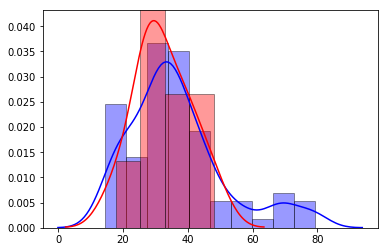

In [138]:
sns.distplot(average, hist=True, kde=True, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot(var10, hist=True, kde=True, 
             color = 'red',
             hist_kws={'edgecolor':'black'})

In [141]:
X = np.load('./analysis/step_by_step_cvar.npy')
VAR10 = np.load('./analysis/step_by_step_var10.npy')

In [146]:
steps = 240
Early = np.zeros((100, steps))
for i in range(100):
    this = X[i, :]
    this = this[this > 0.0]
    Early[i, :] = this[0:steps]
    #plt.plot(moving_average(this, 5))
    #plt.xlim([0, 50])
    
steps = 240
VAR10_Early = np.zeros((10, steps))
for i in range(10):
    this = VAR10[i, :]
    this = this[this > 0.0]
    VAR10_Early[i, :] = this[0:steps]
    #plt.plot(moving_average(this, 5))
    #plt.xlim([0, 50])

(0, 50)

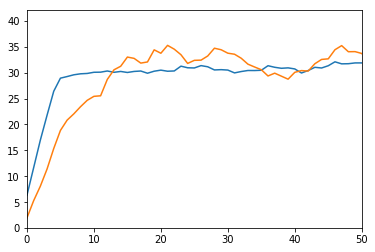

In [148]:
plt.plot(moving_average(np.mean(Early, axis = 0), 5))
plt.plot(moving_average(np.mean(VAR10_Early, axis = 0), 5))
plt.xlim([0, 50])

In [134]:
### How does this change if we add variance?

In [145]:
VAR10_Early

array([[ 1.30990708,  1.58549014,  1.50257149, ..., 25.81068031,
        45.20496001, 26.06935561],
       [ 1.01925   ,  1.0455    ,  1.        , ..., 34.88992798,
        42.30543978, 25.89375118],
       [ 1.23797264,  1.12079255,  1.71892072, ..., 23.72406049,
        30.9565261 , 28.28079639],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])